# Integrating various kernels into Jupyter

## Introduction

Jupyter notebooks provides a powerful tool to propagate our works. They can be used to integrate various kernels into one interface: Matlab, Mathematica and Python for example. 
Moreover, all the writings can be performed in `Markdown` which is based on `html` and $\LaTeX$ approach to writing. 

This is `Markdown`, and as you see is very *nice* and **handy**. An inline formula here $a_n$, and an eqution below $\downarrow$

$$\frac{\sqrt{2} \sqrt{z} j_{\nu - \frac{1}{2}}\left(z\right)}{\sqrt{\pi}}.$$

To download the nicest packages you need to install [Anaconda](http://docs.anaconda.com/anaconda/install/) with the
latest version of *Phyton* (3.5 or above). This will give you the first and original kernel of the conda enviroment. 
You will need to create a user profile to make it work, and share notebooks with other people.

Then you need to download [nteract](https://nteract.io), which let's you maniplate several kernels from a very nice 
notebook *á lá Mathematica* interface. You will need to create a GitHub account to share the 
notebooks from *nteract* (you already did it for *Mathlab*). Read [**this**](https://blog.nteract.io/nteract-revolutionizing-the-notebook-experience-d106ca5d2c38)
to see all the powerfull ways of showing off your scientific document.

![nteract download page](https://i.imgur.com/VQ7oyBk.jpg)

## Additional Kernels (Matlab and Mathematica)

The *Matlab kernel* for Jupyter needs to [downloaded](https://github.com/Calysto/matlab_kernel). 
Before running this setup using `$pip install matlab_kernel` you need to have installed the [Matlab engine for Python](https://www.mathworks.com/help/matlab/matlab-engine-for-python.html).


If everything ran smoothly you should be able to switch to *Matlab kernel*. In *Phyton* versions greater than *3.6*, an error will occur when loading the Jupyter kernel. Although it will solved some time in the near future, a work around exists replacing `line 251` in the `kernel.py` file found at `/Users/<user>/anaconda3/lib/python3.7/site-packages/matlab_kernel/` by 

    251     future = self._matlab.eval(code, **{ 'nargout': 0, 'async': True}).

![](https://imgur.com/930hL4c.jpg)

Once everything is settle down, you can run it

In [1]:
disp('hello from MATLAB')

hello from MATLAB


On the other hand, Wolfram has introduced a *Link* between **Mathematica** and Python. Your kernel should be set to Python. Then,

In [1]:
from wolframclient.evaluation import WolframLanguageSession

In [2]:
from wolframclient.language import *

In [3]:
session = WolframLanguageSession()

This three lines are required to create a Mathematica Session in Python.

In [4]:
session.evaluate(wlexpr('Range[5]'))

[1, 2, 3, 4, 5]

A basic symbolic evaluatio looks like this.

In [7]:
session.evaluate('Expand[(x+1)^2] // MatrixForm')

MatrixForm[Plus[1, Times[2, Global`x], Power[Global`x, 2]]]

which is not so useful... imagine a BesselJ assymptotic expansion:

In [99]:
session.evaluate('Series[BesselJ[nu, x], {x, Infinity, 2}]')

Plus[Times[Cos[SeriesData[Global`x, DirectedInfinity[1], << 2 >>, 3, 1]], SeriesData[Global`x, DirectedInfinity[1], << 2 >>, 5, 2]], Times[SeriesData[Global`x, DirectedInfinity[1], << 2 >>, 5, 2], Sin[SeriesData[Global`x, DirectedInfinity[1], << 2 >>, 3, 1]]]]

It becomes unreadeable. An `ExporString` function must be called, but still

In [100]:
session.evaluate('ExportString[Expand[(1+x)^2], "TeXFragment"]')

'\\[1+2 x+x^2\\]\n\n'

It is almos $\LaTeX$. But you need to replace `'\\[` and `\\]\n\n'` by `$$` $$1+2 x+x^2$$ to make it friendly. For more long calculations like this

In [119]:
session.evaluate('ExportString[Series[BesselJ[n, x], {x, Infinity, 2}],"TeXFragment"]')

'\\[\\text{Cos}\\left[-x+\\frac{1}{4} (\\pi +2 n \\pi )+O\\left[\\frac{1}{x}\\right]^3\\right] \\left(\\sqrt{\\frac{2}{\\pi }} \\sqrt{\\frac{1}{x}}+O\\left[\\frac{1}{x}\\right]^{5/2}\\right)+\\left(\\frac{\\left(-1+4\nn^2\\right) \\left(\\frac{1}{x}\\right)^{3/2}}{4 \\sqrt{2 \\pi }}+O\\left[\\frac{1}{x}\\right]^{5/2}\\right) \\text{Sin}\\left[-x+\\frac{1}{4} (\\pi +2 n \\pi )+O\\left[\\frac{1}{x}\\right]^3\\right]\\]\n\n'

Then just by *replacing* every `\\` by a single `\` and the ending and 
beginging makes it difficult and time consuming just for a simple result

$$\left(\frac{\left(4 n^2-1\right) \left(\frac{1}{x}\right)^{3/2}}{4 \sqrt{2 \pi }}+O\left(\left(\frac{1}{x}\right)^{5/2}\right)\right) \sin \left(-x+\frac{1}{4} (2 \pi  n+\pi )+O\left(\left(\frac{1}{x}\right)^3\right)\right)+\\+\left(\sqrt{\frac{2}{\pi }} \sqrt{\frac{1}{x}}+O\left(\left(\frac{1}{x}\right)^{5/2}\right)\right) \cos \left(-x+\frac{1}{4} (2 \pi  n+\pi )+O\left(\left(\frac{1}{x}\right)^3\right)\right).$$

This is too convoluted, and a simple approach is abscent from *Wolfram* side. 
It is best to install the [`wolfram kernel`](https://github.com/mmatera/iwolfram) 
from Mauricio Matera. You need to download it and run (**Windows and Linux**)

    $ python setup.py install --mma-exec <Mathematica executable>
    
 On **MacOS** you need to put the script `wmath` 
 into `/Applications/Mathematica.app/Contents/MacOS/` and then `$sudo chmod 755 wmath`. Once this is done, run
    
    $ python setup.py install --mma-exec /Applications/Mathematica.app/Contents/MacOS/wmath

A simple command will look like this

In [1]:
Series[Exp[x],{x,0,3}]

SeriesData[x, 0, {1, 1, 1/2, 1/6}, 0, 4, 1]

If you want to have the result expressed in $\LaTeX$ form just add `//Matrix Form` at the end like this

In [1]:
FunctionExpand[Factorial2[n], Assumptions -> n \[Element] Integers] //MatrixForm

<IPython.core.display.Latex object>

In [2]:
Series[BesselJ[n,x],{x,Infinity,1}] //MatrixForm

<IPython.core.display.Latex object>

But if you want just the $\LaTeX$ code ouput use `TexForm` like this

In [4]:
TeXForm[Series[BesselJ[n,x],{x,Infinity,1}]]

\left(\frac{\left(4 n^2-1\right) \left(\frac{1}{x}\right)^{3/2}}{4 \sqrt{2 \pi }}+O\left(\left(\frac{1}{x}\right)^2\right)\right) \sin \left(-x+\frac{1}{4} (2 \pi  n+\pi )+O\left(\left(\frac{1}{x}\right)^2\right)\right)+\left(\sqrt{\frac{2}{\pi }} \sqrt{\frac{1}{x}}+O\left(\left(\frac{1}{x}\right)^{3/2}\right)\right) \cos \left(-x+\frac{1}{4} (2 \pi  n+\pi )+O\left(\left(\frac{1}{x}\right)^2\right)\right)

Some integrals may contain *kernel messages* about potential problems in the expresion

In [7]:
Integrate[
 Exp[I (A Cos[\[Theta]] + B Sin[\[Theta]])], {\[Theta], 0, 2 \[Pi]}, Assumptions -> A>0 && B>0] //MatrixForm

Infinity::indet: StringForm[Infinity::indet /. Messages[Infinity], HoldForm[0*Infinity]]

Infinity::indet: StringForm[Infinity::indet /. Messages[Infinity], HoldForm[0*Infinity]]

Infinity::indet: StringForm[Infinity::indet /. Messages[Infinity], HoldForm[-Infinity + Infinity]]

Infinity::indet: StringForm[Infinity::indet /. Messages[Infinity], HoldForm[-Infinity + Infinity]]

Infinity::indet: StringForm[Infinity::indet /. Messages[Infinity], HoldForm[E^ComplexInfinity]]

Infinity::indet: StringForm[Infinity::indet /. Messages[Infinity], HoldForm[E^ComplexInfinity]]

Infinity::indet: StringForm[Infinity::indet /. Messages[Infinity], HoldForm[E^ComplexInfinity]]

Infinity::indet: StringForm[Infinity::indet /. Messages[Infinity], HoldForm[E^ComplexInfinity]]

Infinity::indet: StringForm[Infinity::indet /. Messages[Infinity], HoldForm[E^ComplexInfinity]]

Infinity::indet: StringForm[Infinity::indet /. Messages[Infinity], HoldForm[0*Infinity]]

Infinity::indet: StringForm[Infinity::indet /

<IPython.core.display.Latex object>

Some times this has nothing to do
with convergence, but a problem in the *wofram kernel* for Jupyter. If nothing is wrong with the convergence you can turn 
this messages off using

In [15]:
Off[Infinity::indet,MinValue::lpsub,MaxValue::lpsub];

In [13]:
Integrate[
 Exp[I (A Cos[\[Theta]] + B Sin[\[Theta]])], {\[Theta], 0, 2 \[Pi]},Assumptions -> A>0 && B>0] //MatrixForm

<IPython.core.display.Latex object>

In [14]:
Series[Hypergeometric2F1[a,b,c,x],{x,Infinity,2}]//MatrixForm

<IPython.core.display.Latex object>

This must cover all related to the kernels we are comfortable with. Next update for this notebook will be how to manipulate plots.

## Some basics IPython

In [1]:
from sympy import *

*imports* everything from sympy 

In [3]:
from mpmath import *

*imports* everything from mpath 

In [2]:
k, m, n = symbols('k m n', integer=True)

In [3]:
f, g, h = symbols('f g h', cls=Function)

In [4]:
x, y, z, nu = symbols('x y z nu')

In [5]:
from sympy.abc import n,a,b,x

In [6]:
init_printing()

The code above turns output into $\LaTeX$ commands.

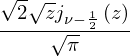

In [7]:
besselj(nu,z).rewrite(jn)

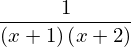

In [10]:
1/((x+2)*(x+1))

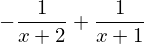

In [11]:
apart(1/((x+2)*(x+1)))

## Series Expansion

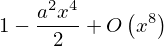

In [8]:
cos(a*x**2).series(x,0,8)

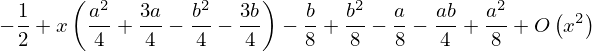

In [9]:
jacobi(2,a,b,x).series(x,0,2)

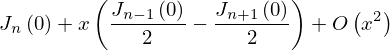

In [10]:
besselj(n,x).series(x,0,2)

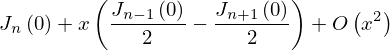

In [11]:
series(besselj(n,x),x,0,2)

While the line below cannot be evaluated. For $n$ or any fixed value of it.

In [12]:
besselj(0,x).series(x,oo,2)

PoleError: 
Asymptotic expansion of besselj around [0, oo] is not implemented.

Let us chech the *package* mpath to see if hypergeometric functions are of any help.

In [17]:
hyp0f1(2,x).series(x,0)

TypeError: cannot create mpf from x

NO. This a floating-point package, not for symbolic manipulation.

In [13]:
f = fps(sin(x))

In [16]:
integrate(f,(x,0,1))

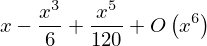

In [19]:
f.truncate()

In [21]:
g=fps(besselj(1,x))